In [39]:
result_file = 'result.csv'
model = 'nyc-taxi-green-dec-2016_d10_l450_n899_20240903074159'

In [40]:
import pandas as pd
import numpy as np

df = pd.read_csv(result_file)
df = df[df['model'] == model]
df

,model,pruned,predicate,data,scale,threads,time
33,nyc-taxi-green-dec-2016_d10_l450_n899_20240903...,False,0.000000,nyc-taxi-green-dec-2016,1G,2,1.546171
34,nyc-taxi-green-dec-2016_d10_l450_n899_20240903...,True,0.420043,nyc-taxi-green-dec-2016,1G,2,1.404749
35,nyc-taxi-green-dec-2016_d10_l450_n899_20240903...,True,0.830135,nyc-taxi-green-dec-2016,1G,2,1.547628
36,nyc-taxi-green-dec-2016_d10_l450_n899_20240903...,True,1.240227,nyc-taxi-green-dec-2016,1G,2,1.478206
37,nyc-taxi-green-dec-2016_d10_l450_n899_20240903...,True,1.650320,nyc-taxi-green-dec-2016,1G,2,1.335123
38,nyc-taxi-green-dec-2016_d10_l450_n899_20240903...,True,2.060412,nyc-taxi-green-dec-2016,1G,2,1.288739
39,nyc-taxi-green-dec-2016_d10_l450_n899_20240903...,True,2.470504,nyc-taxi-green-dec-2016,1G,2,0.917531
40,nyc-taxi-green-dec-2016_d10_l450_n899_20240903...,True,2.880597,nyc-taxi-green-dec-2016,1G,2,0.958645
41,nyc-taxi-green-dec-2016_d10_l450_n899_20240903...,True,3.290689,nyc-taxi-green-dec-2016,1G,2,0.912614
42,nyc-taxi-green-dec-2016_d10_l450_n899_20240903...,True,3.700781,nyc-taxi-green-dec-2016,1G,2,0.919676


In [41]:
data = df[df['pruned'] == False]['data'].values[0]
threads = df[df['pruned'] == False]['threads'].values[0]
scale = df[df['pruned'] == False]['scale'].values[0]


base_line = df[df['pruned'] == False]['time'].values[0]
x = df[df['pruned'] == True]['predicate'].values
y = df[df['pruned'] == True]['time'].values
y

array([1.40474868, 1.54762824, 1.4782056 , 1.33512274, 1.2887392 ,
       0.91753101, 0.95864463, 0.91261411, 0.91967551, 0.91878994])

(0.0, 1.579378950595856)

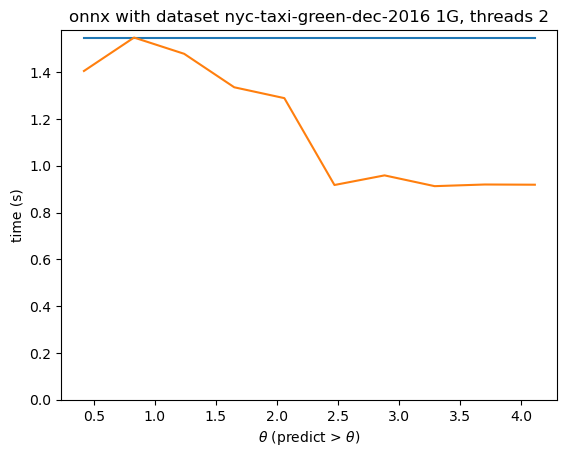

In [42]:
import matplotlib.pyplot as plt

plt.plot(x, [base_line for _ in range(len(x))])
plt.plot(x, y)
plt.title(f'onnx with dataset {data} {scale}, threads {threads}')
plt.ylabel('time (s)')
plt.xlabel('$\\theta$ (predict > $\\theta$)')
plt.ylim(0)

In [43]:
base_line / y

array([1.10067437, 0.99905832, 1.04597822, 1.15807395, 1.19975466,
       1.6851429 , 1.61287178, 1.69422197, 1.68121349, 1.68283391])

(0.0, 1.7289801526208082)

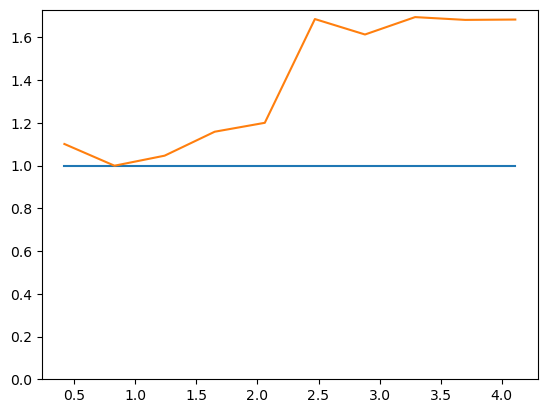

In [44]:
plt.plot(x, [1 for _ in range(len(x))])
plt.plot(x, base_line / y)
plt.ylim(0)